<a href="https://www.kaggle.com/code/roshanrawat/sentiment-analysis?scriptVersionId=109423194" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviewdataset/amazon_reviews.csv


In this project we will use Natural Language Processing(NLP) techniques to predict customer sentiment from real Amazon Echo customer reviews.

AI/ML based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not.

The process could be done automatically without having humans manually review thousands of customer reviews.


In [2]:
pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [4]:
#Loading the data
reviews_df=pd.read_csv("../input/amazonreviewdataset/amazon_reviews.csv")
reviews_df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [5]:
# Dataset Information
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
#Dataframe Statistical Summary
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
#Dropping the date column from the dataframe
reviews_df= reviews_df.drop(['date'], axis=1)

In [8]:
reviews_df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


# **Performing Data Visualization**

<AxesSubplot:>

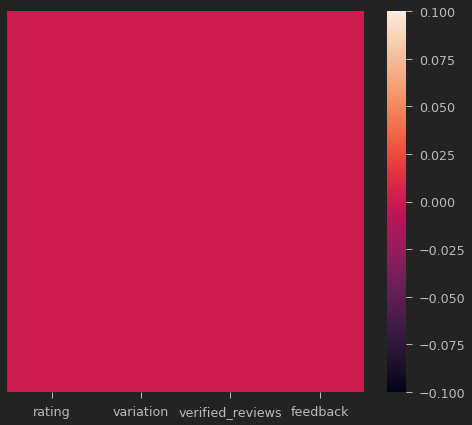

In [9]:
#The heatmap indicates we have no mising values in the dataframe
sns.heatmap(reviews_df.isnull(), yticklabels=False)

<AxesSubplot:xlabel='rating', ylabel='count'>

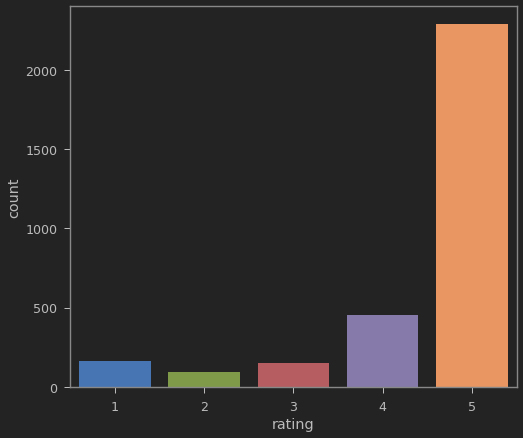

In [10]:
#Plot count plot for the ratings 
sns.countplot(x=reviews_df['rating'])

<AxesSubplot:xlabel='feedback', ylabel='count'>

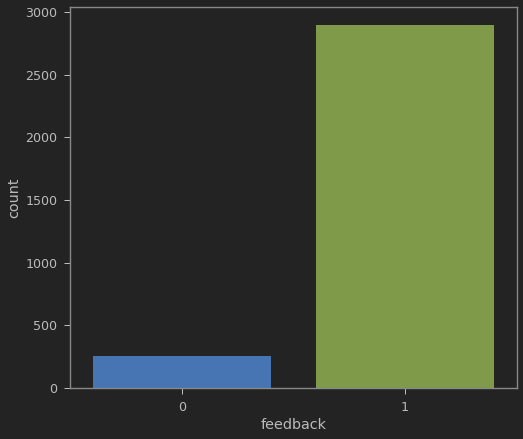

In [11]:
sns.countplot(x=reviews_df['feedback'])

# # ****Data Exploration****

In [12]:
#Let's get the length of verified column
reviews_df['length']= reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot:ylabel='Frequency'>

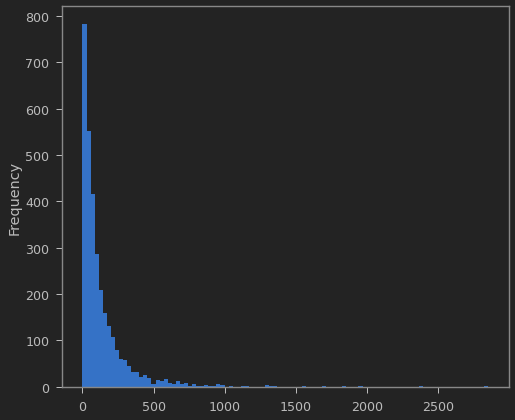

In [13]:
#Plotting the histogram for length column
reviews_df['length'].plot(bins=100, kind='hist')

# # # Plot the WordCloud

In [14]:
#First fetching only positive views
positive=reviews_df[reviews_df['feedback'] == 1 ].reset_index()
positive

,index,rating,variation,verified_reviews,feedback,length
0,0,5,Charcoal Fabric,Love my Echo!,1,13
1,1,5,Charcoal Fabric,Loved it!,1,9
2,2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
2888,3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
2889,3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
2890,3147,5,Black Dot,"I do love these things, i have them running my...",1,441
2891,3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


In [15]:
#Fetching negative reviews
negative=reviews_df[reviews_df['feedback']==0].reset_index()
negative

,index,rating,variation,verified_reviews,feedback,length
0,46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
1,111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
2,141,1,Charcoal Fabric,Not much features.,0,18
3,162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
4,176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
252,3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
253,3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
254,3067,2,Black Dot,The only negative we have on this product is t...,0,240
255,3091,1,Black Dot,I didn’t order it,0,17


In [16]:
#To make a wordcloud we need to convert the dataframe into a list
sentences=positive['verified_reviews'].tolist()
len(sentences)

2893

In [17]:
#Joining all reviews into one large string
sentences_as_one_string = ' '.join(sentences)

In [18]:
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

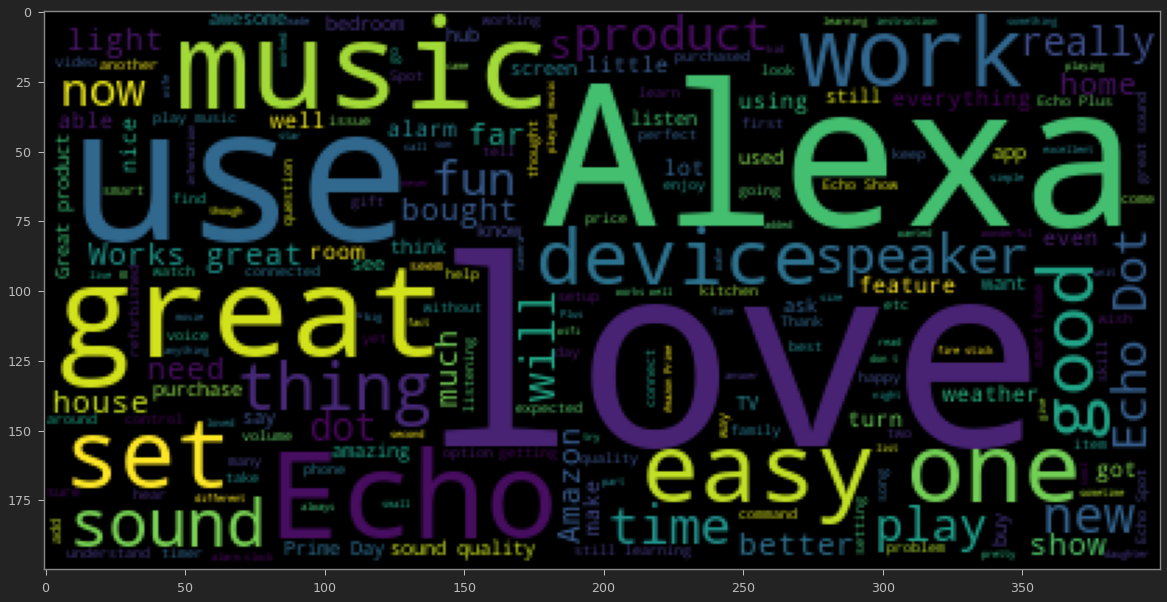

In [19]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [20]:
#Similarly for negative reviews
sentences_negative=negative['verified_reviews'].tolist()
len(sentences_negative)

257

In [21]:
sentences_as_one_negative=' '.join(sentences_negative)

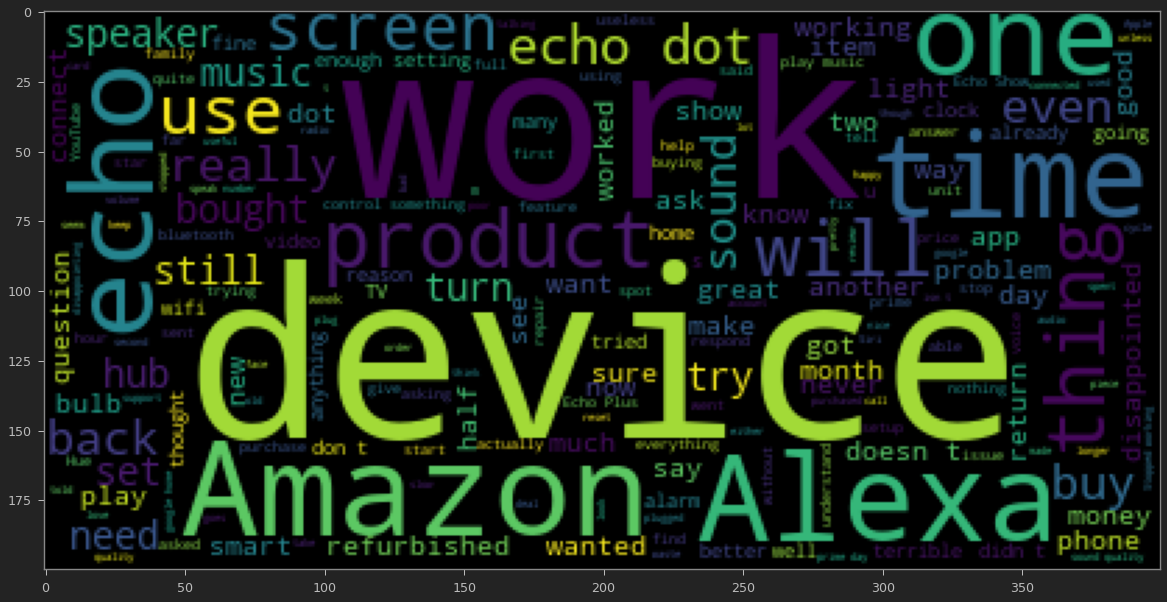

In [22]:
#WordCloud for negative reviews
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_negative))

# #Text Data Cleaning

In [23]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
Test= ' $ I love Machine Learning and Deep Learning./... !!!! '

In [25]:
test_punc_removed = [ char for char in Test if char not in string.punctuation]
test_punc_removed

[' ',
 ' ',
 'I',
 ' ',
 'l',
 'o',
 'v',
 'e',
 ' ',
 'M',
 'a',
 'c',
 'h',
 'i',
 'n',
 'e',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'D',
 'e',
 'e',
 'p',
 ' ',
 'L',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 ' ']

In [26]:
test_punc_removed_join=''.join(test_punc_removed)
test_punc_removed_join

'  I love Machine Learning and Deep Learning  '

In [27]:
#Natural Language Processing library
import nltk

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Creating a pipeline to remove punctuations and stopwords and perform Counter Vectorization

In [29]:
#Let's define a pipeline to clean up all the reviews
# The pipeline performs the following i) Remove Punctuations ii) Remove stopwords
def message_cleaning(message):
    test_punc_removed=[ char for char in message if char not in string.punctuation]
    test_punc_removed_join=''.join(test_punc_removed)
    test_punc_removed_join_clean=[ words for words in test_punc_removed_join.split() if words.lower() not in stopwords.words('english')]
    
    return test_punc_removed_join_clean

In [30]:
#Let's test the newly added function
reviews_df_clean= reviews_df['verified_reviews'].apply(message_cleaning)

In [31]:
#Show the original review
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [32]:
#Review after applying punctuation removal and stopword removal
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


# Performing Count Vectorizer

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer=vectorizer.fit_transform(reviews_df['verified_reviews'])

In [34]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
#Converting it into array
print(reviews_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
reviews_countvectorizer.shape

(3150, 5211)

In [37]:
reviews=pd.DataFrame(reviews_countvectorizer.toarray())

In [38]:
#Input for our model
X= reviews
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Output for model
y= reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

# # Train and Test Naive Bayes Classifier Model

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [41]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier= MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

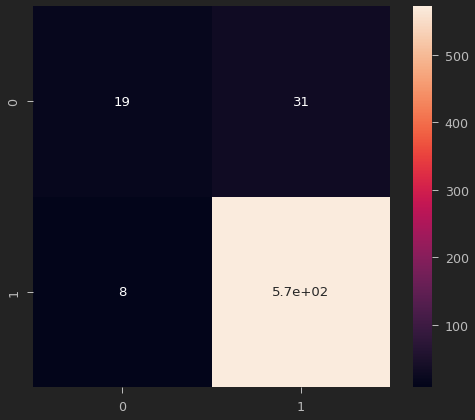

In [43]:
#Predicting the test set results
y_predict_test= NB_classifier.predict(X_test)
cm =confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot= True)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.38      0.49        50
           1       0.95      0.99      0.97       580

    accuracy                           0.94       630
   macro avg       0.83      0.68      0.73       630
weighted avg       0.93      0.94      0.93       630



# Performing Logistic Regression


              precision    recall  f1-score   support

           0       0.81      0.52      0.63        50
           1       0.96      0.99      0.97       580

    accuracy                           0.95       630
   macro avg       0.89      0.75      0.80       630
weighted avg       0.95      0.95      0.95       630



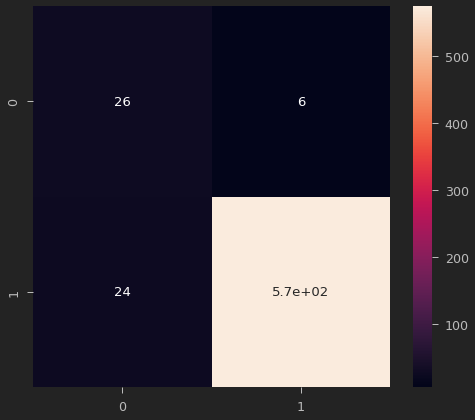

In [45]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

cm=confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))